In [1]:
import numpy as np
import pandas as pd

df_BankCustomer = pd.read_csv("/kaggle/input/bank-customer/BankCustomer.csv")
df_BankCustomer.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Male,37,Tianjin,3,2,1,1,634,31937.37,137062,0
1,Xue Baochai,Female,39,Beijing,9,1,1,1,556,18144.95,110194,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129910,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976,1


In [2]:
X_data = df_BankCustomer.drop(["Exited","Name","City"], axis=1)
X_data['Gender'].replace("Female", 0, inplace = True) # no need to get_dummies
X_data['Gender'].replace("Male", 1, inplace=True)
b = pd.get_dummies(df_BankCustomer['City'], prefix='City')
X_data = pd.concat([X_data, b], axis=1)
X_data.replace(True, 1, inplace = True) # no need to get_dummies
X_data.replace(False, 0, inplace=True)
y_data = df_BankCustomer.Exited

X_data
# y_data

,Gender,Age,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,City_Beijing,City_Shanghai,City_Tianjin
0,1,37,3,2,1,1,634,31937.37,137062,0,0,1
1,0,39,9,1,1,1,556,18144.95,110194,1,0,0
2,0,32,9,1,1,1,803,10378.09,236311,1,0,0
3,0,37,0,2,1,1,778,25564.01,129910,0,0,1
4,1,55,4,3,1,0,547,3235.61,136976,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,7,2,0,1,746,1930.44,0,0,1,0
9996,1,36,1,1,1,0,569,29593.82,82518,1,0,0
9997,0,55,7,1,0,0,850,32841.84,0,0,1,0
9998,1,35,5,1,1,1,529,21564.34,117801,0,1,0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


((8000, 12), (2000, 12), (8000,), (2000,))

In [4]:
# 标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

# X_train.head()
# X_test.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [5]:
import keras
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras全连接层
from keras.layers import Dropout #导入Dropout

ann = Sequential() #创建一个序贯ann模型
ann.add(Dense(units=12, input_dim=12, activation='relu')) # 添加输入层
ann.add(Dense(units=24, activation='relu')) # 添加隐层
ann.add(Dropout(0.5))
ann.add(Dense(units=48, activation='relu')) # 添加隐层
ann.add(Dropout(0.5))
ann.add(Dense(units=96, activation='relu')) # 添加隐层
ann.add(Dropout(0.5))
ann.add(Dense(units=192, activation='relu')) # 添加隐层
ann.add(Dropout(0.5))
ann.add(Dense(units=1, activation='sigmoid')) # 添加输出层
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 96)                4704      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0

In [6]:
ann.compile(optimizer='adam', # 优化器
           loss='binary_crossentropy', # 损失函数
           metrics=['acc']) # 评估指标

In [7]:
# 导入回调功能
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

# 设置回调功能
earlystop = EarlyStopping(monitor='val_acc',patience=20,verbose=1,restore_best_weights=True)
reducelr = ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,verbose=1,min_lr=1e-7)
modelckpt = ModelCheckpoint(filepath='ann.h5',monitor='val_acc',verbose=1,save_best_only=True,mode='max')

callbacks = [earlystop, reducelr, modelckpt]

history = ann.fit(X_train, y_train,
                 epochs=100, # 指定最大轮次
                 batch_size=16, # 指定批量大小
                 validation_data=(X_test, y_test),# 指定验证集
                 callbacks=callbacks) # 指定回调功能

# 每次训练得到的history居然不是完全一样的，神经网络的训练过程有随机性
# 改变batch-size有时会提升效果，比如本例中调小batch-size可以得到更好的训练效果

Epoch 1/100
492/500 [============================>.] - ETA: 0s - loss: 0.5106 - acc: 0.7961
Epoch 1: val_acc improved from -inf to 0.79150, saving model to ann.h5
500/500 [==============================] - 6s 4ms/step - loss: 0.5099 - acc: 0.7964 - val_loss: 0.4640 - val_acc: 0.7915 - lr: 0.0010
Epoch 2/100
 48/500 [=>............................] - ETA: 1s - loss: 0.4721 - acc: 0.8034

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


493/500 [============================>.] - ETA: 0s - loss: 0.4694 - acc: 0.7967
Epoch 2: val_acc did not improve from 0.79150
500/500 [==============================] - 2s 4ms/step - loss: 0.4686 - acc: 0.7974 - val_loss: 0.4582 - val_acc: 0.7910 - lr: 0.0010
Epoch 3/100
496/500 [============================>.] - ETA: 0s - loss: 0.4492 - acc: 0.7980
Epoch 3: val_acc improved from 0.79150 to 0.80350, saving model to ann.h5
500/500 [==============================] - 2s 4ms/step - loss: 0.4499 - acc: 0.7975 - val_loss: 0.4486 - val_acc: 0.8035 - lr: 0.0010
Epoch 4/100
498/500 [============================>.] - ETA: 0s - loss: 0.4306 - acc: 0.8028
Epoch 4: val_acc improved from 0.80350 to 0.83850, saving model to ann.h5
500/500 [==============================] - 2s 4ms/step - loss: 0.4306 - acc: 0.8029 - val_loss: 0.4132 - val_acc: 0.8385 - lr: 0.0010
Epoch 5/100
499/500 [============================>.] - ETA: 0s - loss: 0.4173 - acc: 0.8189
Epoch 5: val_acc improved from 0.83850 to 0.8430

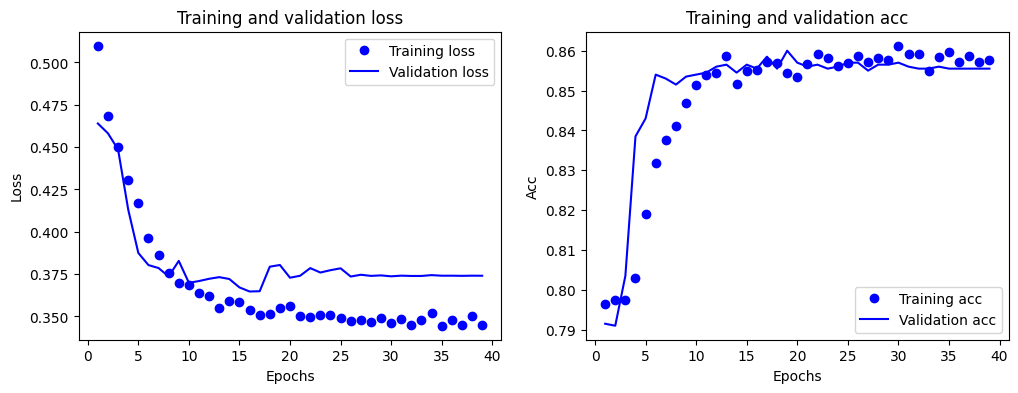

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

show_history(history)

In [9]:
from sklearn.metrics import classification_report # 导入分类报告

y_pred = ann.predict(X_test, batch_size=10) # 预测测试集的标签
y_pred = np.around(y_pred)
y_test = y_test.values # 把pandas series转化成np.array
y_test = y_test.reshape((len(y_test),1))
print(classification_report(y_test, y_pred, labels=[0,1]))


200/200 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1583
           1       0.75      0.50      0.60       417

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



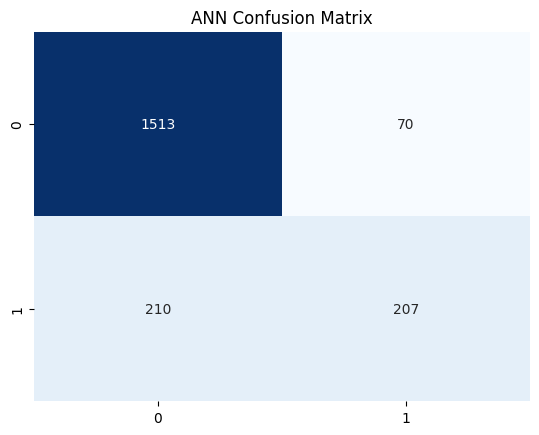

In [10]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵

cm = confusion_matrix(y_test, y_pred) # 调用混淆矩阵
plt.title("ANN Confusion Matrix") # 标题
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.show()